# What's an SVM?

A classification algorithm.

Remember Logistic Regression?
 * Linear model whose parameters derived from maximizing log-likelihood of odds ratios.
 * Outputs were probability estimates.
 
Why do we need SVM?
 * Imagine a trivial case where we have two categories of points that are completely
separable.
 * Why should we choose the logistic regression line out of all the possible options? Maybe
some other line would be best?

# Linear Algebra

Let's let L be an _affine set_, a hyperplane that doesn't pass through the origin.

$$ L = \{x:f(x) = \beta_0 + \beta^Tx=0\} $$

$ f(x) $ is proprtional to the signed distance from $ x $ to the hyperplane.

Remembering that "the projection of $ x $ onto $ \beta $" is:

$$ proj_\beta(x) = x \cdot \frac{\beta}{|\beta|} $$

# Optimal Separating Hyperplanes

If our data is "perfectly separable"

$$ max_{\beta, \beta_0} M $$
subject to:
$$ y_i(x_i^T\beta + \beta_0) \ge M, \forall i = 1,...,N $$
$$ ||\beta|| = 1 $$

# Maximizing the Margin

The optimal separating hyperplane gives us an alternative separating line to the logistic regression line.

Why would we want an alternative?

* Boundary points (support) are most important
* Consequences for prediction
* Convergence problems for Logistic Regression
* Cares about "accuracy"

# Non Separable Case

What if our data is not separable? This means we can't satisfy these constraints for all $ i $.

$$ y_i(x_i^T\beta + \beta_0) \ge M, \forall i = 1,...,N $$

Which we'll discuss this afternoon.

# Morning Sprint Notes:

1. You will compare Logistic Regression with Maximal Margin Classifier.
1. You'll be plotting boundaries, remember `matplotlib` function signature.
1. Keep in mind separable data is a _very special case_

# Support Vector Machines

Objectives:

* Differentiate SVM from Maximal Margin Classfier
* Derive in completely separating case.
* Write full specification and understand the components of that specification
* Extend understanding to include the "kernel trick"
* Learn what's necessary to use SVMs in practice.

# Imperfectly Separable

$$ max_{\beta, \beta_0}M $$
subject to:
$$ ||\beta|| = 1 $$
$$ y_i(x_i^T\beta + \beta_0) \ge M(1-\xi_i)\forall i$$
$$ \xi_i \ge 0, \sum_i \xi_i <\ constant $$

We can transform that into a minimization problem that looks like:

$$ min_{\beta, \beta_0} \frac{1}{2}||\beta||^2 + C\sum_{i=1}^N \xi_i $$
subject to:
$$ \xi \ge 0 $$
and
$$ y_i(x_i^T\beta+\beta_0) \ge 1 - \xi_i \forall i $$

Which of the terms above is a cost function and which is the margin?


# Hinge Loss

$$ y_i(x_i^T\beta+\beta_0) \ge 1 - \xi_i $$
$$ 1 - y_i(x_i^T\beta+\beta_0) \le \xi_i $$

So what does this function look like if things are classified correctly (incorrectly)?

# Practical Concerns

* Class imbalance ( `class_weight` argument in sklearn)
* Scaling (as usual)

# Woop dee doo
## Another linear classfier

What if our data is non-linear? Of course we could use basis transformations like those we used with logistic regression for example. Something like:
    
$$ \hat{f}(x) = h(x)^T\hat{\beta} + \hat{\beta_0} $$

Where

$$ h: N \rightarrow V $$

But what transformations? How many? What if I want to use a lot?

![kerneltrick](https://camo.githubusercontent.com/cc731fecfbaf6cfb597bbf308eeac964ca9daffc/687474703a2f2f72766c617376656c642e6769746875622e696f2f696d616765732f6f632d73766d2f76697375616c697a6174696f6e2e676966)

# The "trick"

We can use the "kernel trick" to avoid explicitly evaluating $h$ for some cases.

There are certain kernel functions $k: NxN \rightarrow \mathbb{R} $, which can be expressed as an inner product in some other (much) higher-dimensional space.

$$ k(x,x') = \langle h(x), h(x') \rangle v $$

Since the inner product gives us a notion of similarity, which is related to the inverse of distance, we will have a solution for:

$$ f(x) = \beta_0 + \sum_{i=1}^N \alpha_ik(x, x_i) $$

Computing $k(.,.) $ can often be cheaper than directly computing the basis transforms $ h(.) $.

# Can I use my favorite basis transforms?

Popular kernels include:
    
Radial Basis Function (`rbf`) or Gaussian
$$ K(x,y) = exp(\gamma||x-y||^2) $$

Polynomial
$$ K(x,y) = (a + x^Ty)^d $$

and Sigmoid (Hyperbolic Tangent)

$$ tanh(\gamma\langle x, y\rangle + r) $$

Other kernels are possible, but in practice RBF is commonly used on a wide range, and found to perform well.
                

# Why use SVM or kernels?

1. Sparsity of solutions achievable via l1 penalty.
1. Rows and columns: lots of columns may allow linearity, few rows may require it.
1. Interpretability of coefficients in linear case.
1. Use of kernels may be effective for prediction.
1. When margin might be the right idea?


# Multi-class classification

So far, we've talked about how to classify two-class data, but what if there are more than two classes?

Two approaches:

* One vs. Rest
* One vs. One

# One vs. Rest

If we have $ K $ classes, train $ K $ models. Let $f_k$ be the kth model. To choose a class for our problem we simply:

$$ f(x) = argmax_kf_k(x) $$


# One vs. One

If we have $ K $ classes, train $ K(K-1)/2 $ models.

Then let

$$ f(x) = argmax_k(\sum_j f_{kj}(x)) $$

for example, choose the case with the maximum number of votes.

# OvR vs. OvO

## OvR

* Requires probabilities
* Trains K models, with N rows each.

## OvO
* Votes may have ties
* Trains $ K(K-1)/2 $ models, but models have only $ 2 \frac{N}{K} $ rows in them.

# Real examples

Let's see a real example of logistic regression vs. SVMs.

In [13]:
import federalist_papers as FP
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
reload(FP)
%pylab inline
fp = FP.FedPapers()
fp.load_data()

Populating the interactive namespace from numpy and matplotlib


/Users/isaac/anaconda/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['axes', 'logistic']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [8]:
df = fp.get_df()
authors = ['(Hamilton)', '(Madison)']
df = df[df.Author.isin(authors)]
y = df.Author
X = scale(df.loc[:,['would','upon']])

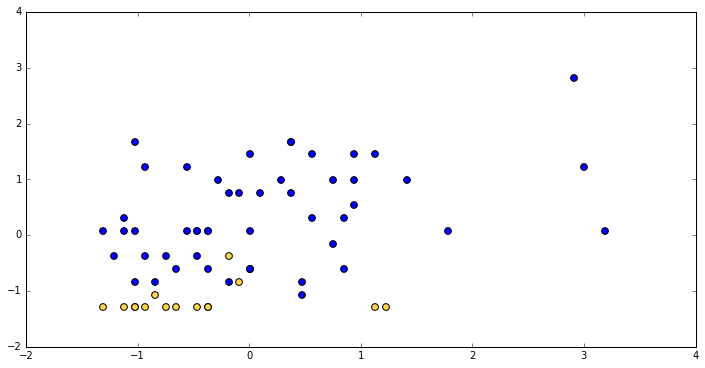

In [9]:
def plot_points(ax, X, y, **kwargs):
    mask = (y=='(Hamilton)').values
    masks = [mask, ~mask]
    colors = ['blue', '#FFD44D']
    for mask, color in zip(masks, colors):
        subX = X[mask,:]
        ax.scatter(subX[:,0], subX[:,1], c=color, **kwargs)
        
fig = plt.figure()
fig.set_size_inches((12,6))
ax = plt.subplot(111)
plot_points(ax, X, y, s=45)

In [10]:
logistic = LogisticRegression()
logistic.fit(X,y!='(Hamilton)')

def slope_intercept(clf):
    coef = clf.coef_[0]
    return -clf.coef[0]/clf.coef[1], -clf.intercept_/clf.coef[1]


def plot_decision_boundary(ax, clf):
    h = .005
    x_min, x_max = (-2, 3.5)
    y_min, y_max = (-2, 3.5)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 

    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.seismic, alpha=0.3)

    plot_points(ax, X, y)
    
def plot_margins(ax, clf):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-2, 3.5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
    yy_down = yy + a * margin
    yy_up = yy - a * margin

    # plot the line, the points, and the nearest vectors to the plane
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')
    
    plot_decision_boundary(ax, clf)

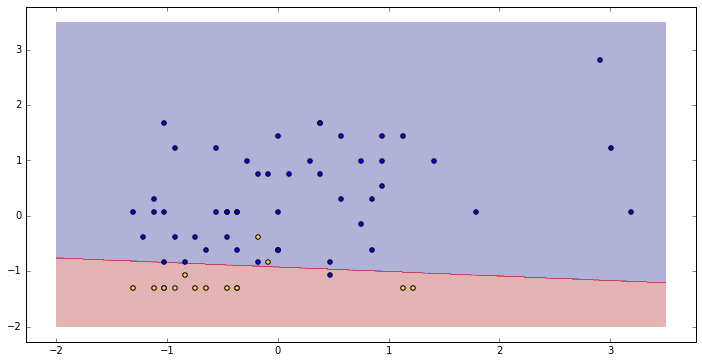

In [11]:
fig = plt.figure()
fig.set_size_inches((12,6))
ax = plt.subplot(111)
plot_decision_boundary(ax, logistic)

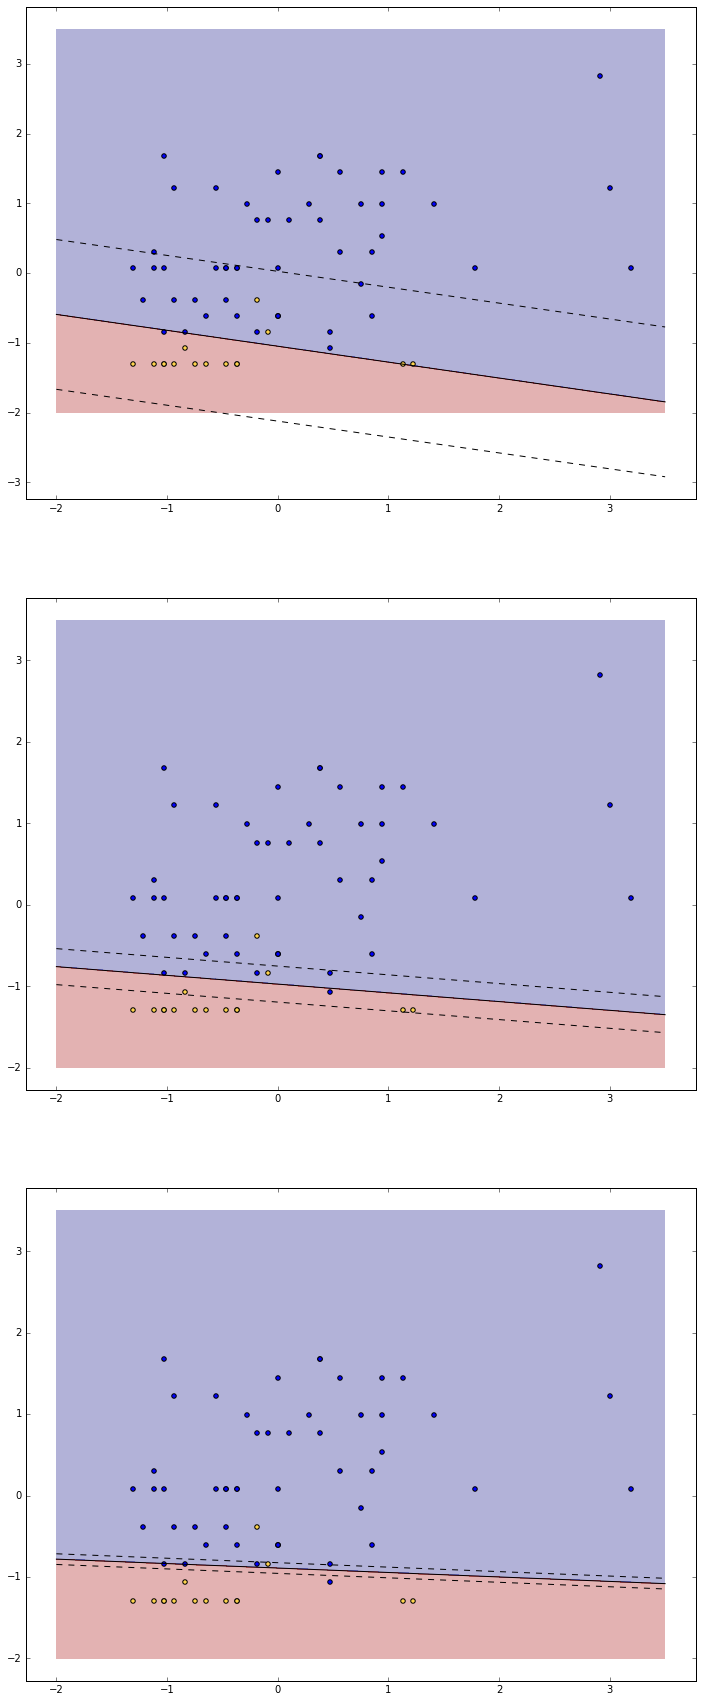

In [14]:
Cs = [.005, .03, .1]
fig, axes = plt.subplots(len(Cs),1)
fig.set_size_inches((12,30))
for ax, C in zip(axes, Cs):
    linear_svc = LinearSVC(C=C)
    linear_svc.fit(X, y!='(Hamilton)')
    plot_margins(ax, linear_svc)

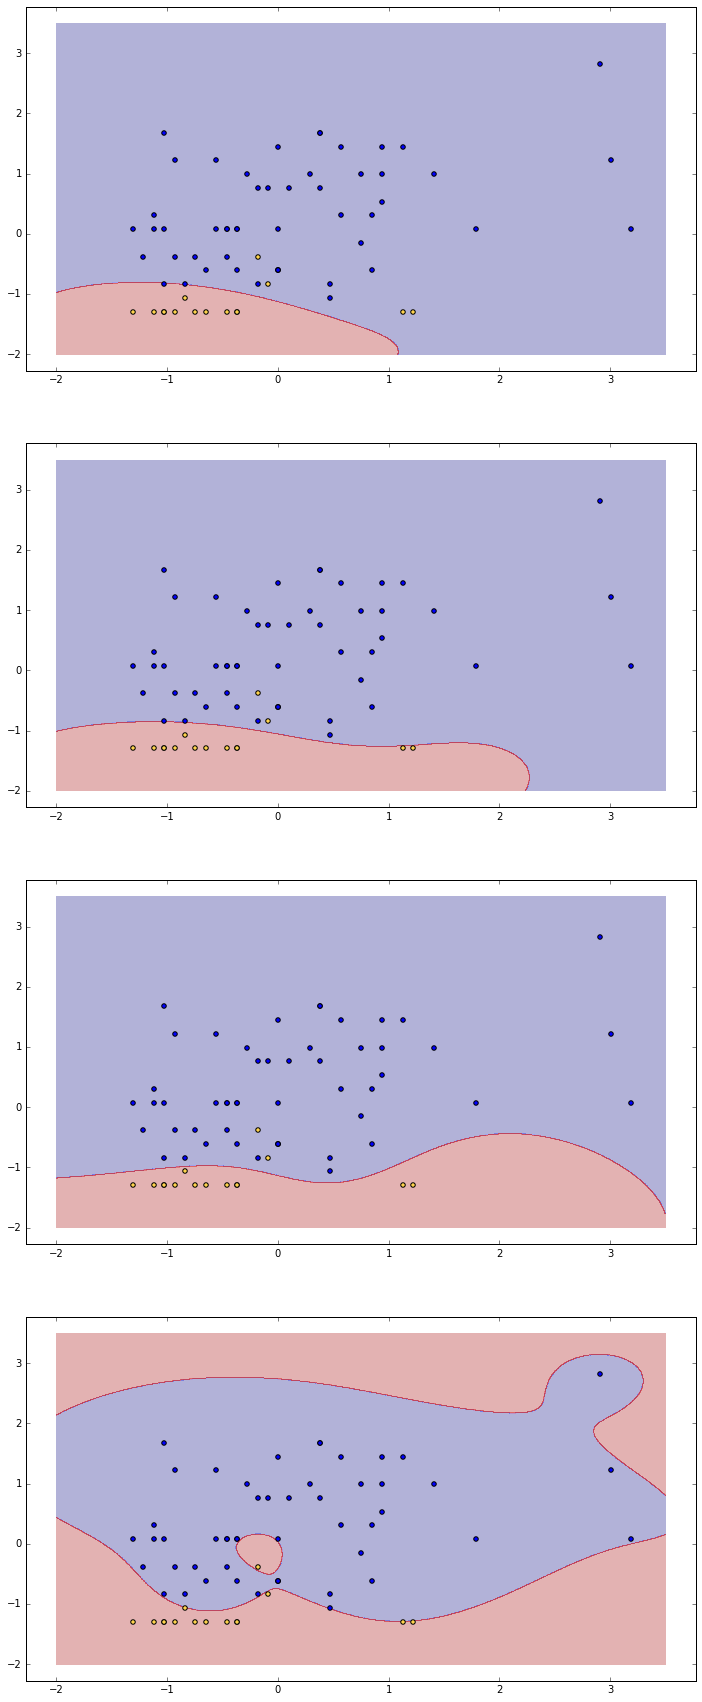

In [17]:
Cs = [.5, 1, 10, 100000]
fig, axes = plt.subplots(len(Cs),1)
fig.set_size_inches((12,30))
for ax, C in zip(axes, Cs):
    svc = SVC(kernel='rbf', C=C)
    svc.fit(X, y!='(Hamilton)')
    plot_decision_boundary(ax, svc)